<a href="https://colab.research.google.com/github/Vicysaragih/Applied-Data-Science-Capstone/blob/master/TOURIST_EDA_PANDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/Touristm.zip'
df = pd.read_csv(path)
df.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


**1. DATA UNDERSTANDING**

In [ ]:
df.shape

(437, 13)

In [ ]:
df.columns

Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

In [ ]:
df.dtypes

Place_Id          int64
Place_Name       object
Description      object
Category         object
City             object
Price             int64
Rating          float64
Time_Minutes    float64
Coordinate       object
Lat             float64
Long            float64
Unnamed: 11     float64
Unnamed: 12       int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [ ]:
df.describe()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.0,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,NaN,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,NaN,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,NaN,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,NaN,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,NaN,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,NaN,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,NaN,437.000000


**2. DATA PREPARATION**

In [ ]:
df = df[['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating', 
    #'Time_Minutes', 
    'Coordinate', 
    #'Lat', 'Long', 'Unnamed: 11','Unnamed: 12'
    ]].copy()


In [ ]:
df.shape

(437, 8)

In [ ]:
df.isna().sum()

Place_Id       0
Place_Name     0
Description    0
Category       0
City           0
Price          0
Rating         0
Coordinate     0
dtype: int64

In [ ]:
# Check for duplicate values sum()
df.duplicated().sum()

0

In [ ]:
df.sort_values (['Rating', 'Place_Name', 'City', 'Category'], ascending = False).head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate
28,29,Wisata Kuliner Pecenongan,Pecenongan merupakan salah satu surga kuliner ...,Pusat Perbelanjaan,Jakarta,0,5.0,"{'lat': -6.166788700000001, 'lng': 106.8265261}"
123,124,Kauman Pakualaman Yogyakarta,Pakualaman adalah sebuah kecamatan di Kota Yog...,Budaya,Yogyakarta,0,5.0,"{'lat': -7.801034700000001, 'lng': 110.3751922}"
68,69,Freedom Library,Freedom Library adalah perpustakaan buku yang ...,Budaya,Jakarta,0,5.0,"{'lat': -6.202248200000001, 'lng': 106.8451968}"
94,95,Desa Wisata Sungai Code Jogja Kota,"Kampung Code berada di Kelurahan Kotabaru, Kec...",Taman Hiburan,Yogyakarta,0,5.0,"{'lat': -7.822908900000001, 'lng': 110.3756894}"
411,412,Masjid Nasional Al-Akbar,Masjid Nasional Al Akbar (atau biasa disebut M...,Tempat Ibadah,Surabaya,0,4.9,"{'lat': -7.336614099999998, 'lng': 112.7151806}"


**3. FEATURE UNDERSTANDING**

In [ ]:
dfs = df[['Place_Name', 'City', 'Category', 'Rating', 'Price']]
dfs.sort_values(by=['Rating'], ascending=False).head()

,Place_Name,City,Category,Rating,Price
68,Freedom Library,Jakarta,Budaya,5.0,0
94,Desa Wisata Sungai Code Jogja Kota,Yogyakarta,Taman Hiburan,5.0,0
123,Kauman Pakualaman Yogyakarta,Yogyakarta,Budaya,5.0,0
28,Wisata Kuliner Pecenongan,Jakarta,Pusat Perbelanjaan,5.0,0
277,Masjid Daarut Tauhiid Bandung,Bandung,Tempat Ibadah,4.9,0


In [ ]:
df['Rating'].value_counts()

4.5    98
4.4    98
4.6    75
4.3    47
4.7    37
4.2    20
4.1    20
4.0    18
4.8    10
5.0     4
4.9     4
3.9     3
3.8     2
3.4     1
Name: Rating, dtype: int64

Text(0, 0.5, 'Count')

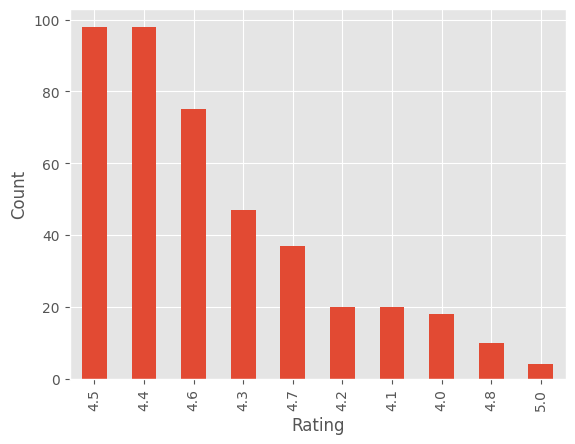

In [ ]:
ax = df['Rating'].value_counts() \
    .head(10) \
    .plot(kind='bar')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

In [ ]:
a = dfs[dfs['City']=='Jakarta']

In [ ]:
a['Category'].value_counts()

Budaya                32
Taman Hiburan         27
Pusat Perbelanjaan    10
Bahari                 8
Cagar Alam             4
Tempat Ibadah          3
Name: Category, dtype: int64

Text(0, 0.5, 'Count')

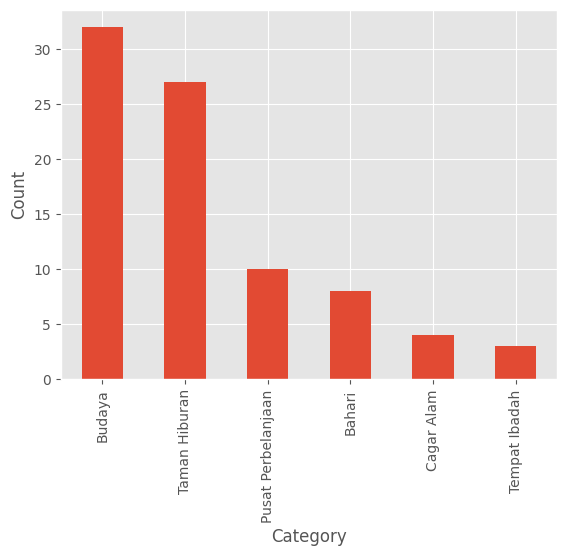

In [ ]:
ax = a['Category'].value_counts() \
    .plot(kind='bar')
ax.set_xlabel('Category')
ax.set_ylabel('Count')

In [ ]:
dfs[(dfs['City']=='Jakarta') & (dfs['Rating'] >= 4.5)].sort_values(by=['Rating'], ascending=False).head(10)

,Place_Name,City,Category,Rating,Price
68,Freedom Library,Jakarta,Budaya,5.0,0
28,Wisata Kuliner Pecenongan,Jakarta,Pusat Perbelanjaan,5.0,0
13,Pulau Pelangi,Jakarta,Bahari,4.8,900000
22,Gereja Katedral,Jakarta,Tempat Ibadah,4.8,0
48,Galeri Indonesia Kaya,Jakarta,Budaya,4.8,0
69,Perpustakaan Nasional,Jakarta,Budaya,4.7,0
43,Monumen Selamat Datang,Jakarta,Budaya,4.7,0
63,Museum Sasmita Loka Ahmad Yani,Jakarta,Budaya,4.7,2000
17,Museum Bank Indonesia,Jakarta,Budaya,4.7,2000
62,Museum Kebangkitan Nasional,Jakarta,Budaya,4.7,2000


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


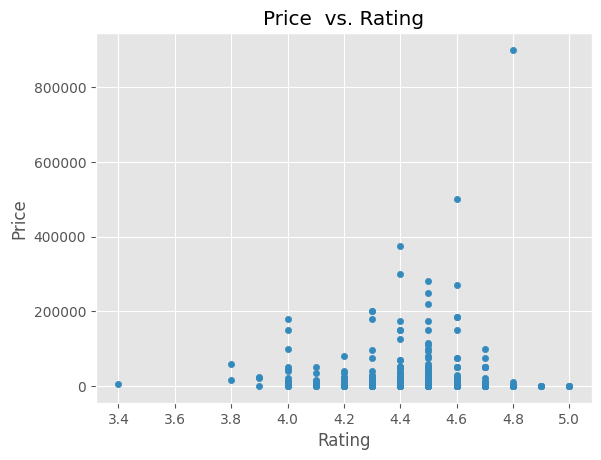

In [ ]:
df.plot(kind='scatter',
        x='Rating',
        y='Price',
        title='Price  vs. Rating')
plt.show()

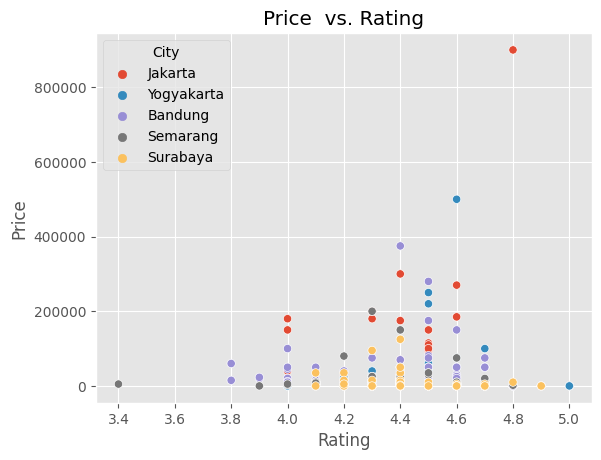

In [ ]:
ax = sns.scatterplot(x='Rating',
                y='Price',
                hue='City',
                data=df)
ax.set_title('Price  vs. Rating')
plt.show()